# Estadística Aplicada
## Karen Lorelei Cerda Roiz  1945088
### 9na Sesión 2 de marzo del 2023

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import KaplanMeierFitter

Vamos a hacer el mismo ejercicio que se hizo a mano del nuevo medicamento con tratados y no tratados

In [3]:
# Guardar datos de los tratados
dic_t = {'tiempo': [12,19,20,20,33],
        'evento': [1,1,1,0,0]}

In [4]:
# Guardar datos de los no tratados
dic_nt = {'tiempo': [3,5,7,9,18],
         'evento':[1,1,1,0,1]}

In [6]:
trat = pd.DataFrame(dic_t)
no_trat = pd.DataFrame(dic_nt)

In [10]:
trat

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [7]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [8]:
km_t = KaplanMeierFitter().fit(trat['tiempo'], trat['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'], no_trat['evento'])

In [9]:
#Valores estimados de Kaplan Meier de los no tratados
km_nt.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.8
5.0,0.6
7.0,0.4
9.0,0.4
18.0,0.0


In [11]:
#Valores estimados de Kaplan Meier de los tratados
km_t.survival_function_

,KM_estimate
timeline,
0.0,1.0
12.0,0.8
19.0,0.6
20.0,0.4
33.0,0.4


In [13]:
# di= observed , ci=censored , ni= at_risk
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


In [14]:
# di= observed , ci=censored , ni= at_risk
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


<AxesSubplot:xlabel='timeline'>

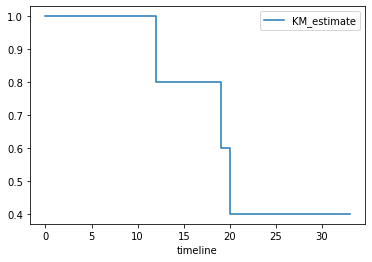

In [15]:
#Gráfica de función de supervivencia de los tratados
km_t.plot_survival_function(ci_show = False)

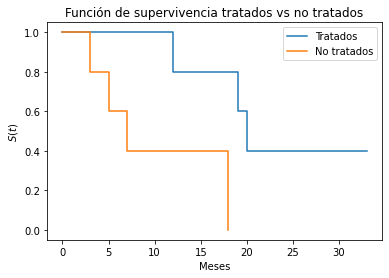

In [20]:
#Gráfica de función de supervivencia de los tratados y los no tratados
km_t.plot_survival_function(label = 'Tratados', ci_show = False)
km_nt.plot_survival_function(label = 'No tratados', ci_show = False)
plt.title('Función de supervivencia tratados vs no tratados')
plt.ylabel('$S(t)$')
plt.xlabel('Meses')
plt.show()

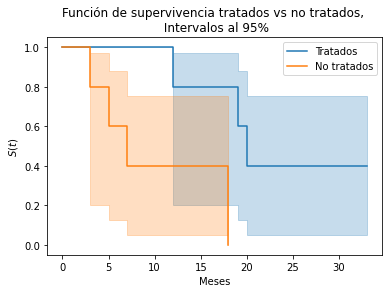

In [21]:
#Gráfica de función de supervivencia con intervalos de 95% de confianza
km_t.plot_survival_function(label = 'Tratados')
km_nt.plot_survival_function(label = 'No tratados')
plt.title('Función de supervivencia tratados vs no tratados, \n Intervalos al 95%')
plt.ylabel('$S(t)$')
plt.xlabel('Meses')
plt.show()

Para hacer el long Rank Test

In [22]:
from lifelines.statistics import logrank_test

In [23]:
lrt = logrank_test(trat['tiempo'] , trat['evento'] ,
                   no_trat['tiempo'] , no_trat['evento'])

In [25]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

**Regla de Decisión:** 
 Si p-value < $\alpha$, rechazamos $H_0$

**Conclusión:**
A un 95% de confianza rechazamos $H_0$, lo que significa que las funciones de supervivencia de tratados y no tratados son distintas.

In [26]:
km_nt.median_survival_time_

7.0

El 50% de los no tratados murió antes de los 7 meses

In [27]:
km_t.median_survival_time_

20.0

El 50% de los tratados sobrevive más de 20 meses.

In [29]:
from lifelines import ExponentialFitter

In [31]:
exp_t = ExponentialFitter().fit(trat['tiempo'], trat['evento'])

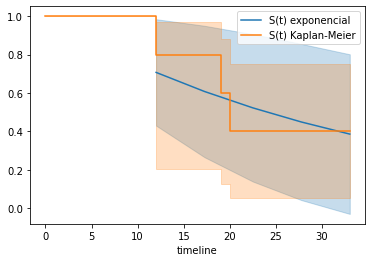

In [34]:
exp_t.plot_survival_function(label = 'S(t) exponencial')
km_t.plot_survival_function(label = 'S(t) Kaplan-Meier')
plt.show()